In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for text pre-processing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Package for splitting the input data
from sklearn.model_selection import train_test_split

# Metrics to evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Packages for building an ML model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [2]:
# Dataset - E-commerce customer service questions and topics
# https://github.com/sambit9238/Machine-Learning/blob/master/question_topic.csv
df = pd.read_csv('./datasets/question_topic.csv', index_col=0, names=['text', 'topic'], header=0)

df.sample(7)

,text,topic
1591,What kind of promotions do you have at the mom...,Sales/Promotions
1193,How much will your standard shipping cost to s...,Shipping
3225,I think I'm going to get the Optimum Nutrition...,Returns & Refunds
598,Do you have any methyl B-12 supplements I can ...,Product Availability
1186,Is there any restocking fee or processing fee ...,Returns & Refunds
1133,I was wondering if the men's chinos (WEB ITEM:...,Product Specifications
713,I'm looking for a maroon men's blazer. I'd nee...,Product Availability


In [3]:
df.shape

(5000, 2)

In [4]:
print(df.text[100])
print(">>>>")
print(df.topic[100])

When do you think I'd receive the SKU #: 089836185259 if I order it tomorrow and it's being shipped to Oakland, CA? Do you have an overnight shipping option?
>>>>
Shipping


In [5]:
df['topic'].value_counts() # all questions are related to 7 unique topics

Product Specifications    839
Product Availability      833
Product Comparison        806
Shipping                  799
Returns & Refunds         768
Sales/Promotions          505
Omnichannel               450
Name: topic, dtype: int64

In [6]:
# Create a new column 'category_id' with encoded categories 
df['id'] = df['topic'].factorize()[0]
df

,text,topic,id
0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions,0
1,I'm going to be out of the country for about a...,Shipping,1
2,I was wondering if you'd be able to overnight ...,Shipping,1
3,The Swingline electronic stapler (472555) look...,Shipping,1
4,I think this cosmetic bag would work great for...,Shipping,1
...,...,...,...
4995,"Is there a Lululemon in Des Moines, IA? Are yo...",Omnichannel,4
4996,I want to buy either the Ellison recliner 5363...,Product Comparison,5
4997,I'm considering buying either the Liver care d...,Product Comparison,5
4998,I'm considering buying either the PecraClear d...,Product Comparison,5


In [7]:
topic_to_id = df[['topic', 'id']].drop_duplicates(ignore_index=True)
topic_to_id.drop(columns=['id'], inplace=True)
topic_to_id

,topic
0,Sales/Promotions
1,Shipping
2,Product Availability
3,Product Specifications
4,Omnichannel
5,Product Comparison
6,Returns & Refunds


In [8]:
X = df['text']
y = df['id']

In [9]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(5000, 29892)

In [10]:
tfidf_transformer = TfidfTransformer()
tfidf_vector = tfidf_transformer.fit_transform(transformed_vector)
tfidf_vector.shape

(5000, 29892)

In [11]:
X_dense = tfidf_vector.todense() # naive bayes requires the input be in a form of dense matrix
X_dense.shape

(5000, 29892)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2)
X_train.shape, X_test.shape

((4000, 29892), (1000, 29892))

In [13]:
# helper function
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    precision = precision_score(y_test, y_pred, average=avg_method) 
    recall = recall_score(y_test, y_pred, average=avg_method)
    cm = confusion_matrix(y_test, y_pred)
    
    print('Length of the testing data: ', len(y_test))
    print('Accuracy count: ', num_acc)
    print('Accuracy score: ', acc)
    print('Precision score: ', precision)
    print('Recall score: ', recall)
    #cm_display = ConfusionMatrixDisplay(cm).plot()
    
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
                xticklabels=topic_to_id.topic.values, 
                yticklabels=topic_to_id.topic.values)
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("CONFUSION MATRIX", size=16);

In [14]:
clf = GaussianNB().fit(np.array(X_train), y_train)

In [15]:
y_pred = clf.predict(np.array(X_test))

In [16]:
pred_results = pd.DataFrame({'y_test':pd.Series(np.array(y_test)),
                            'y_pred':pd.Series(y_pred)})

pred_results.sample(15)

,y_test,y_pred
820,0,0
323,3,3
963,6,6
718,3,5
449,1,1
87,1,1
542,0,0
171,5,5
200,1,1
379,5,5


Length of the testing data:  1000
Accuracy count:  949
Accuracy score:  0.949
Precision score:  0.9493276504850218
Recall score:  0.949


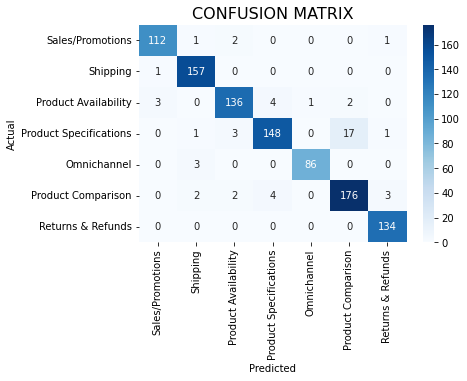

In [17]:
summarize_classification(y_test, y_pred)

In [18]:
new = ["Hello! I have cancelled my order #4352 right after submission. How long will it take to get the refund?",
      "Hi! I have referred my friend to your conpany. Ho to get referral bonus?", 
      "I am dissapoitedd with the quality of the product."]

transformed_vector_new = count_vectorizer.transform(new)
tfidf_vector_new = tfidf_transformer.transform(transformed_vector_new)

In [19]:
new_dense = tfidf_vector_new.todense()

y_pred_new = clf.predict(np.array(new_dense))
print(y_pred_new)

[6 0 3]


In [20]:
topic_to_id.iloc[y_pred_new]

,topic
6,Returns & Refunds
0,Sales/Promotions
3,Product Specifications


In [21]:
def call_predict(complaint):
    transformed_vector_new = count_vectorizer.transform(complaint)
    tfidf_vector_new = tfidf_transformer.transform(transformed_vector_new)
    new_dense = tfidf_vector_new.todense()
    y_pred_new = clf.predict(np.array(new_dense))
    return topic_to_id.iloc[y_pred_new] 

In [22]:
complaint = ["I am not satified with the queality of the dress. I'd like to claim refund."]

In [23]:
prediction = call_predict(complaint)
print(prediction.topic.values)

['Returns & Refunds']
